## **Bollinger Bands**
**Rationale**
- Bollinger Bands are typically used to identify potential overbought and oversold conditions

**Aim**
- We will explore the profitability of using Bollinger Bands as a strategy.

**Limitations**
1. Operates at 1 hour intervals due to Yahoo Finance limitations.
- If it is a viable strategy, use API to convert to shorter time frames, such as 5 or 15 min intervals.

## **Bollinger Bands Indicator**
**The Indicator**

The indicator consists of 3 lines which are relative to the price of the asset:
- Middle Band (Simple Moving Average): Usually a 20 period moving average and is used to represent the trend of the asset.
- Upper Band: A line plotted above the middle band (moving average) and is considered to be the resistance level.
- Lower Band: A line plotted below the middle band (moving average) and is considered to be the support level.

*NOTE: This indicator is often used in conjunction with other technical indicators or strategies to increase its effectiveness.*


**Formula**

It is calculated by the following equation:

$$
Middle Band = \left( \frac{\text{Sum of closing prices over n periods}}{\text{n}} \right)
$$
- where n = number of periods (Usually 20)


$$
Upper Band = Middle Band + k * \sigma
$$

$$
Lower Band = Middle Band - k * \sigma
$$
- where k =  number of standard deviations from the Middle Band. (Usually 2)

**Interpreting the Indicator**

Volatility:
- If the Upper Band and Lower Band is far from the Middle Band (Wide bands), it represents high volatility (large standard deviations).
- If the Upper Band and Lower Band is close to the Middle Band (Narrow bands), it represents low volatility (small standard deviations).

Overbought/ Oversold Levels:
- If price is close to the Upper Band, it is considered to be overbought.
- If price is close to the Lower Band, it is considered to be oversold.

**Gather Historical Data for the stock of interest**
- For this notebook, we will analyse the stock: NVIDIA (Ticker Symbol: NVDA)

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta

from datetime import datetime

In [2]:
def get_historical_data(ticker):
    data = pd.DataFrame()
    stock_data = yf.download(
        ticker,
        start=datetime(2024, 1, 1),
        end=datetime(2024, 10, 1),
        interval='1h',
        prepost=True
    )

    data_ticker = stock_data[['Open', 'High', 'Low', 'Close']]

    data_ticker.columns = [f"{col}" for col in data_ticker.columns]

    data = pd.concat([data, data_ticker], axis=1)
    return data

In [3]:
df = get_historical_data('NVDA')
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000


**Calculate Bollinger Bands using Pandas TA**

In [4]:
df.ta.bbands(length=20, std=2, append=True)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Datetime,,,,,
2024-01-02 04:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2024-01-02 05:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2024-01-02 06:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2024-01-02 07:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2024-01-02 08:00:00-05:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-30 15:30:00-04:00,117.947490,119.986315,122.025139,3.398428,0.868762
2024-09-30 16:00:00-04:00,117.996459,120.078815,122.161171,3.468315,0.769211
2024-09-30 17:00:00-04:00,117.987821,120.106815,122.225809,3.528516,0.724915


In [5]:
df.columns = ['Open', 'High', 'Low', 'Close', 'Lower Band', 'Middle Band', 'Upper Band','Bandwidth', 'Percentage']
df.tail(10)

,Open,High,Low,Close,Lower Band,Middle Band,Upper Band,Bandwidth,Percentage
Datetime,,,,,,,,,
2024-09-30 10:30:00-04:00,120.099998,120.973801,119.660004,120.973801,117.572534,120.225995,122.879455,4.414121,0.640911
2024-09-30 11:30:00-04:00,121.065002,121.099998,120.260002,120.714996,118.018933,120.063245,122.107556,3.405392,0.659406
2024-09-30 12:30:00-04:00,120.720001,120.809998,119.959999,120.100700,118.045739,119.999275,121.952811,3.255913,0.525960
2024-09-30 13:30:00-04:00,120.105003,120.690002,119.180000,119.470001,117.997096,119.960025,121.922953,3.272638,0.375180
2024-09-30 14:30:00-04:00,119.470001,120.360001,119.190002,120.084999,117.999421,119.922775,121.846128,3.207654,0.542172
2024-09-30 15:30:00-04:00,120.080002,121.500000,119.819702,121.489998,117.947490,119.986315,122.025139,3.398428,0.868762
2024-09-30 16:00:00-04:00,121.500000,126.470000,119.410000,121.200000,117.996459,120.078815,122.161171,3.468315,0.769211
2024-09-30 17:00:00-04:00,121.200000,127.999600,120.700000,121.060000,117.987821,120.106815,122.225809,3.528516,0.724915
2024-09-30 18:00:00-04:00,121.060000,121.140000,120.950000,121.080000,118.006573,120.090815,122.175056,3.471109,0.737301


**Visualize Stock Price and Bollinger Bands**

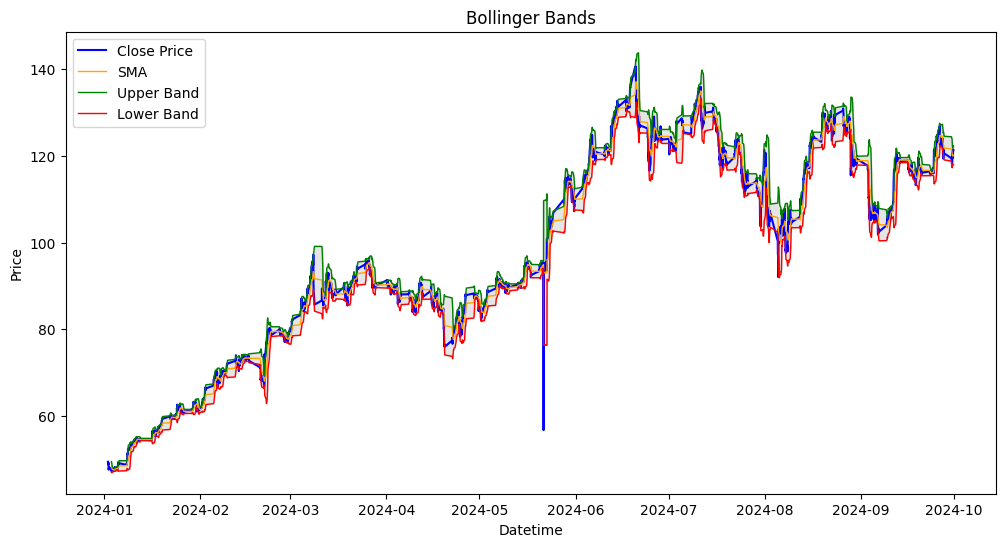

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=1)
plt.plot(df.index, df['Middle Band'], label='SMA', color='orange', linewidth=1)
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='green', linewidth=1)
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='red', linewidth=1)

plt.fill_between(df.index, df["Upper Band"], df["Lower Band"], color="gray", alpha=0.2)
plt.title("Bollinger Bands")
plt.xlabel("Datetime")
plt.ylabel("Price")
plt.legend()
plt.show()

Let's scale to the latest 1000 data points to get a better visualization of the indicator.

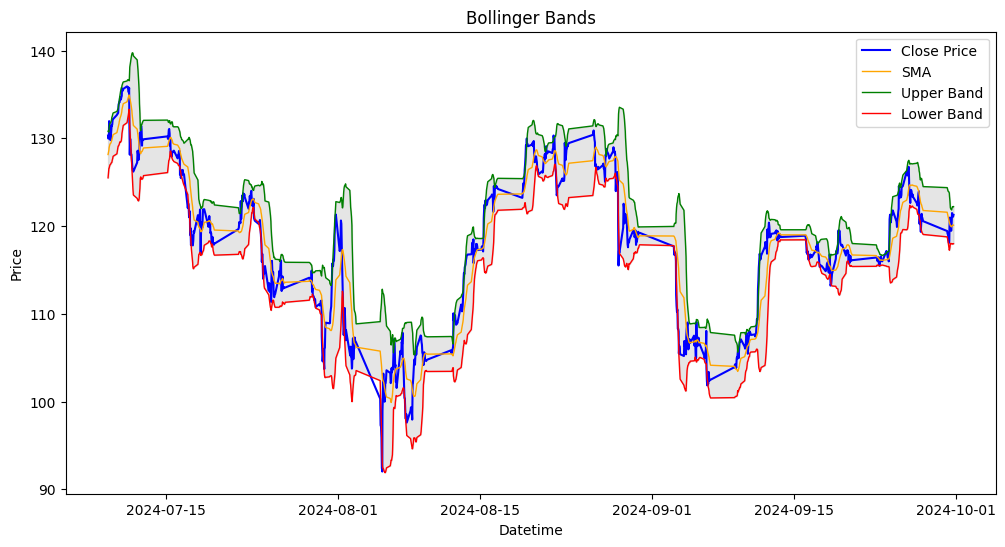

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-1000:], df['Close'][-1000:], label='Close Price', color='blue', alpha=1)
plt.plot(df.index[-1000:], df['Middle Band'][-1000:], label='SMA', color='orange', linewidth=1)
plt.plot(df.index[-1000:], df['Upper Band'][-1000:], label='Upper Band', color='green', linewidth=1)
plt.plot(df.index[-1000:], df['Lower Band'][-1000:], label='Lower Band', color='red', linewidth=1)
plt.fill_between(df.index[-1000:], df["Upper Band"][-1000:], df["Lower Band"][-1000:], color="gray", alpha=0.2)

plt.title("Bollinger Bands")
plt.xlabel("Datetime")
plt.ylabel("Price")
plt.legend()
plt.show()

Remarks:
- As we can see, when the stock prices touches the Lower Band or Upper Band, they tend to revert back to the Moving Average (Middle Band). As such, this allows us to implement a strategy in relation to this.
- Another observation is that whenever the Bollinger Bands contracts and consolidates, there is a higher probability of a significant price movement or breakout in either direction. This also presents another possible strategy that we can implement using this indicator.

**Implement Strategy**

We will now implement our strategy based on the first observation as noted earlier.

The strategy will be as such:
- Entry Point when price hits the Lower Band (Underbought).
- Exit Point when price hits the Upper Band(Overbought).
- Run back-test to test this strategy.

*NOTE: This is considered as a mean-reversion strategy as well.*

In [8]:
def calculate_bband_strategy(df):

  df_close_prices = df['Close'].values
  df_lower_band = df['Lower Band'].values
  df_upper_band = df['Upper Band'].values

  curr_holdings = []
  wins, losses = 0, 0
  net_revenue = 0
  signal = 0 # signal ensures that we do not buy into a stock more than once for a crossover.
  max_holdings = 5 # this ensures we do not have too many holdings at any one point in time

  for i in range(len(df)):
    # ENTRY
    if df_close_prices[i] <= df_lower_band[i] and signal >= 0 and len(curr_holdings) < max_holdings:
        curr_price = round(df_close_prices[i], 2)
        curr_holdings.append(curr_price)
        signal = -1
    # EXIT
    elif df_close_prices[i] >= df_upper_band[i] and signal <= 0:
        for holding in curr_holdings:
            profit = df_close_prices[i] - holding
            net_revenue += profit
            if profit >= 0:
                wins += 1
            else:
                losses += 1
        curr_holdings = []
        signal = 1
    else:
       signal = 0
  return [net_revenue, wins, losses, len(curr_holdings)]

In [9]:
result = calculate_bband_strategy(df)

print(f" Net Revenue: ${round(result[0],2)}, Wins: {result[1]}, Losses: {result[2]}, Open Positions: {result[3]}")

 Net Revenue: $161.85, Wins: 61, Losses: 26, Open Positions: 2


**Remarks**

- While this strategy appears to be highly profitable, it is important to note that this is partly due to the fact that NVDA has been an extremely bullish stock, as shown in our visualizations. Therefore, any underbought opportunities for this stock are highly likely to be good entry points and result in profits regardless.
- If we were to apply this strategy to a stagnant or bearish stock, it would not be as profitable as demonstrated in this notebook.
- Thus, this strategy is often best paired with other momentum-based strategies, such as RSI or MACD.

## **Future Works**

- As mentioned earlier, we can also use the contraction of Bollinger Bands to identify breakout opportunities and enter trades with strong trends, increasing the likelihood of profitability.